In [17]:
import numpy as np
from matplotlib import pyplot as plt
from modules.IFNeurons import *



# quadratic IF

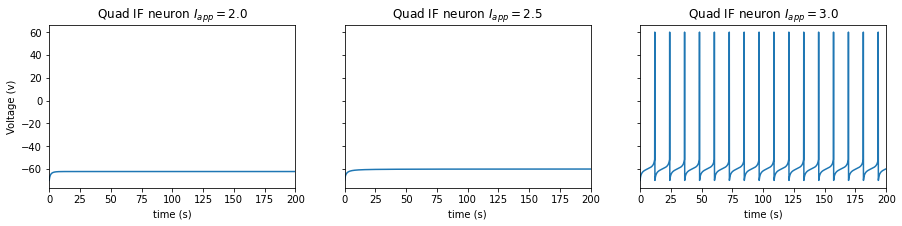

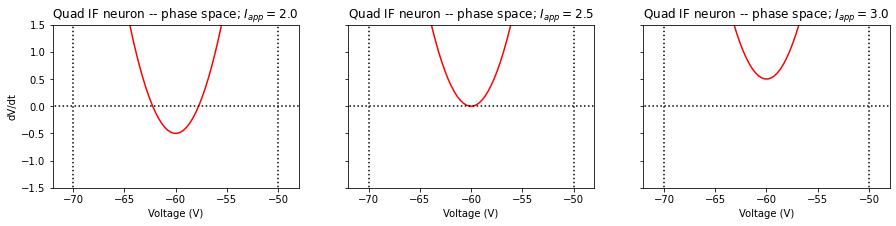

In [42]:
# [C] = muF/cm^2
# [V] = mV
# [G] = mS/cm^2
# [Iapp] = muA/cm^2

# Parameters quadratic IF
C = 1.0
Gqif = 0.1
Vr = -65.0
Vc = -55.0
Iapp = 2.6
Iapp_probe_values = [2.0,2.5,3.0]
 
D = 0.0 #noise amplitude

# Threshold and reset values for V
Vth = -50.0
Vrst = -70.0

# Time definitions
Tmax = 1000.0
dt = 0.1
t = np.linspace(0.0, Tmax, int(Tmax/dt))

# Initial conditions
V0 = Vrst

# integrating the quadratic IF
V = [ integrate_quadIF(dt, t, V0, Vrst, Vth, Gqif, Vr, Vc, C, Iapp)[0] for Iapp in Iapp_probe_values ]
#V=[None,None,None]
#V[0],spkcnt,tspk = integrate_quadIF(dt, t, V0, Vrst, Vth, Gqif, Vr, Vc, C, Iapp_probe_values[0])
#V[1],spkcnt,tspk = integrate_quadIF(dt, t, V0, Vrst, Vth, Gqif, Vr, Vc, C, Iapp_probe_values[1])
#V[2],spkcnt,tspk = integrate_quadIF(dt, t, V0, Vrst, Vth, Gqif, Vr, Vc, C, Iapp_probe_values[2])

fig,ax = plt.subplots(nrows=1,ncols=3,sharey=True,sharex=True,figsize=(15,3))
for i,(VV,II) in enumerate(zip(V,Iapp_probe_values)):
    ax[i].plot(t,VV)
    ax[i].set_xlabel('time (s)')
    ax[i].set_title('Quad IF neuron')
    ax[i].set_title(f'Quad IF neuron $I_{{app}}={II}$')
ax[0].set_ylabel('Voltage (v)')
ax[0].set_xlim((0,200))

fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(15,3))
V_grid_values = np.linspace(-75,-45,100)
for k,II in enumerate(Iapp_probe_values):
    ax[k].plot(V_grid_values,quadIF_func(V_grid_values,Vrst,Vth,Gqif,Vr,Vc,C,II),color=[1,0,0])
    ax[k].plot([Vrst,Vrst],[-10,20],color=[0,0,0],linestyle=':')
    ax[k].plot([Vth,Vth],[-10,20],color=[0,0,0],linestyle=':')
    ax[k].plot([-80,-20],[0,0],color=[0,0,0],linestyle=':')
    ax[k].set_xlabel('Voltage (V)')
    ax[k].set_title(f'Quad IF neuron -- phase space; $I_{{app}}={II}$')
ax[0].set_ylabel('dV/dt')
ax[0].set_xlim((-72,-48))
ax[0].set_ylim((-1.5,1.5))

plt.show()

## calculating frequency vs. Iapp

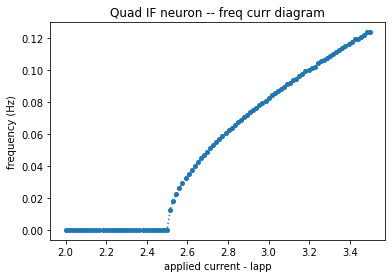

In [2]:
# quadratic IF - calculating frequency vs. Iapp
Imin = 2.0
Imax = 3.5
nI = 100
Iapp = []
f = []
for i, Iapp0 in enumerate(np.linspace(Imin,Imax,nI)):
    V,spkcnt,tspk = integrate_quadIF(dt, t, V0, Vrst, Vth, Gqif, Vr, Vc, C, Iapp0)
    if len(tspk) > 1:
        ISIavg = np.mean(np.diff(tspk))
    else:
        ISIavg = np.inf
    Iapp.append(Iapp0)
    f.append(1.0/ISIavg)

plt.figure(3)
plt.plot(Iapp,f,marker='o',markersize=4,linestyle=':')
plt.xlabel('applied current - Iapp')
plt.ylabel('frequency (Hz)')
plt.title('Quad IF neuron -- freq curr diagram')
plt.show()

# quadratic IF with noise

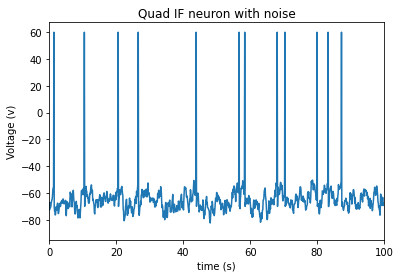

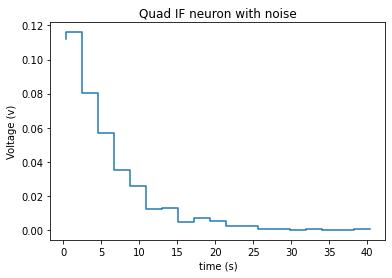

In [8]:
# integrating the quadratic IF with noise
Tmax = 10000.0
dt = 0.1
t = np.linspace(0.0, Tmax, int(Tmax/dt))
Iapp = 0.0
D = 50.0
V,spkcnt,tspk = integrate_quadIF_noise(dt, t, V0, Vrst, Vth, Gqif, Vr, Vc, C, Iapp, D*dt)
ISI = np.diff(tspk)

nBins = 20
ISI_hist, ISI_edges = np.histogram(ISI, nBins, density=True)
ISI_bins = ISI_edges[0:-1]

plt.figure(4)
plt.plot(t,V)
plt.xlabel('time (s)')
plt.ylabel('Voltage (v)')
plt.title('Quad IF neuron with noise')
plt.xlim((0,100))

plt.figure(5)
plt.step(ISI_bins,ISI_hist)
plt.xlabel('time (s)')
plt.ylabel('Voltage (v)')
plt.title('Quad IF neuron with noise')
plt.show()

## calculating frequency vs. Iapp

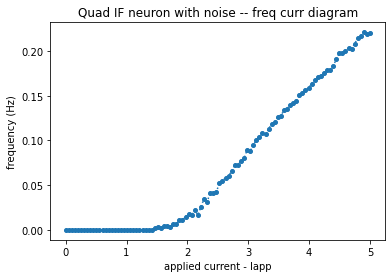

In [11]:

Tmax = 2000.0
dt = 0.1
t = np.linspace(0.0, Tmax, int(Tmax/dt))
Imin = 0.0
Imax = 5
nI = 100
Iapp = []
f = []
D = 1.0
for i, Iapp0 in enumerate(np.linspace(Imin,Imax,nI)):
    V,spkcnt,tspk = integrate_quadIF_noise(dt, t, V0, Vrst, Vth, Gqif, Vr, Vc, C, Iapp0, D*dt)
    if len(tspk) > 1:
        ISIavg = np.mean(np.diff(tspk))
    else:
        ISIavg = np.inf
    Iapp.append(Iapp0)
    f.append(1.0/ISIavg)

plt.figure(5)
plt.plot(Iapp,f,marker='o',markersize=4,linestyle=':')
plt.xlabel('applied current - Iapp')
plt.ylabel('frequency (Hz)')
plt.title('Quad IF neuron with noise -- freq curr diagram')
plt.show()


# quadratic IF with adaptation

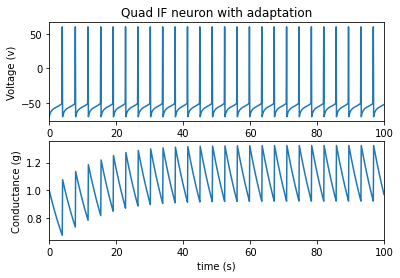

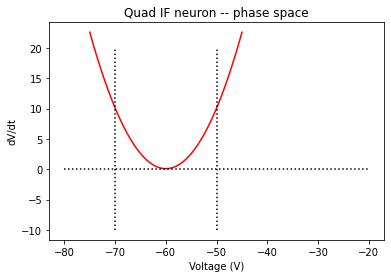

In [14]:
# integrating the quadratic IF with adaptation
Ek = -55.0
tau = 10.0*C
Deltag = 0.4
Iapp = 2.6
g0 = 1.0
Tmax = 2000.0
dt = 0.1
t = np.linspace(0.0, Tmax, int(Tmax/dt))
V,g,spkcnt,tspk = integrate_quadIF_adapt(dt, t, V0, g0, Vrst, Vth, Gqif, Vr, Vc, C, Ek, tau, Deltag, Iapp)

plt.figure(6)
plt.subplot(211)
plt.plot(t,V)
plt.ylabel('Voltage (v)')
plt.title('Quad IF neuron with adaptation')
plt.xlim((0,100))
plt.subplot(212)
plt.plot(t,g)
plt.xlabel('time (s)')
plt.ylabel('Conductance (g)')
plt.xlim((0,100))
plt.figure(7)
VV = np.linspace(-75,-45,100)
plt.plot(VV,quadIF_func(VV,Vrst,Vth,Gqif,Vr,Vc,C,Iapp),color=[1,0,0])
plt.plot([Vrst,Vrst],[-10,20],color=[0,0,0],linestyle=':')
plt.plot([Vth,Vth],[-10,20],color=[0,0,0],linestyle=':')
plt.plot([-80,-20],[0,0],color=[0,0,0],linestyle=':')
plt.xlabel('Voltage (V)')
plt.ylabel('dV/dt')
plt.title('Quad IF neuron -- phase space')
plt.show()

## calculating frequency vs. Iapp

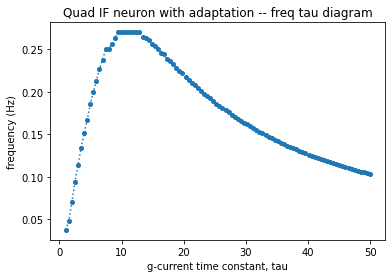

In [16]:

taumin = 1.0*C
taumax = 50.0*C
ntau = 100
tau = []
f = []
for i, tau0 in enumerate(np.linspace(taumin,taumax,ntau)):
    V,g,spkcnt,tspk = integrate_quadIF_adapt(dt, t, V0, g0, Vrst, Vth, Gqif, Vr, Vc, C, Ek, tau0, Deltag, Iapp)
    if len(tspk) > 1:
        ISIavg = np.mean(np.diff(tspk))
    else:
        ISIavg = np.inf
    tau.append(tau0)
    f.append(1.0/ISIavg)

plt.figure(8)
plt.plot(tau,f,marker='o',markersize=4,linestyle=':')
plt.xlabel('g-current time constant, tau')
plt.ylabel('frequency (Hz)')
plt.title('Quad IF neuron with adaptation -- freq tau diagram')
plt.show()

